This notebook illustrates the process of generating the ground truth MHN, from which we will generate our sampled datsets used for evaluation in 'noise_comparison.ipynb'

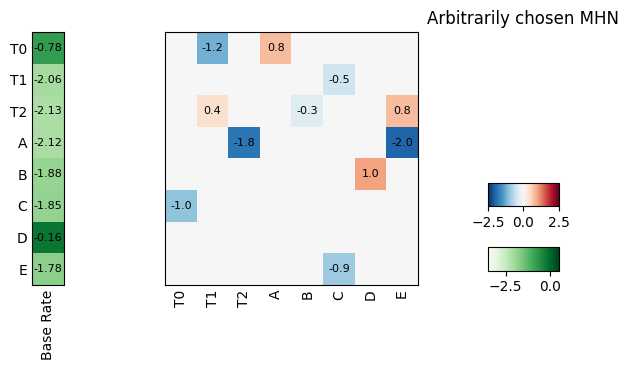

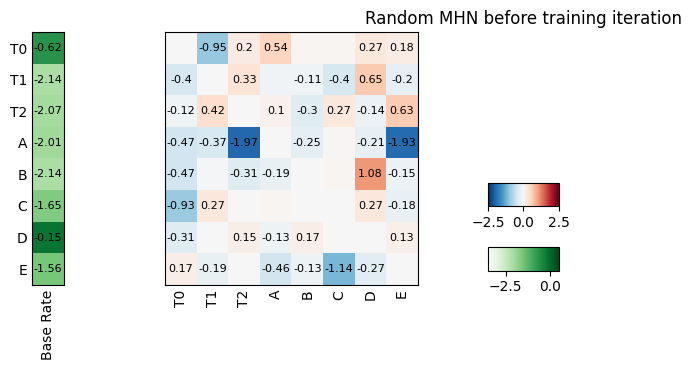

loading from mbonart_checkpoints/rmg1/mhn_SET
loading from mbonart_checkpoints/rmg1/mhn_TRAINED


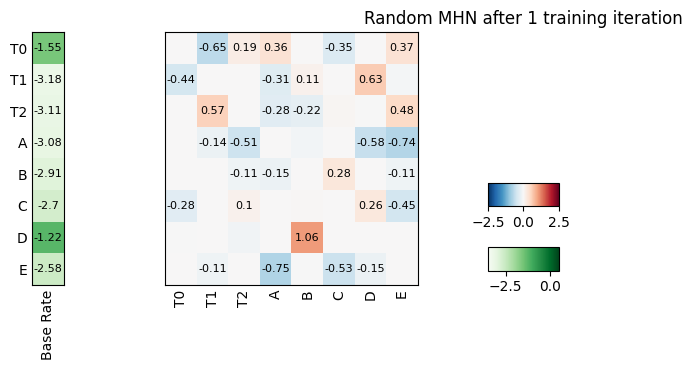

In [ ]:
import mhn
import ClusterableMhnGenerator as cmg
import RandomMHNGenerator as rmg
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

np.random.seed(12345)

cl_generator = cmg.ClusterableMhnGenerator(3,5)
rand_generator = rmg.RandomMHNGenerator(cl_generator.getEvents())
rand_generator.randomizeBaseRates()
rand_generator.getMHN().log_theta[4,6]=1        #arbitrarily chosen values
rand_generator.getMHN().log_theta[3,7]=-2
rand_generator.getMHN().log_theta[2,4]=-0.3
rand_generator.getMHN().log_theta[7,5]=-0.9
rand_generator.getMHN().log_theta[0,1]=-1.2
rand_generator.getMHN().log_theta[2,1]=0.4
rand_generator.getMHN().log_theta[3,2]=-1.8
rand_generator.getMHN().log_theta[1,5]=-0.5
rand_generator.getMHN().log_theta[2,7]=0.8
rand_generator.getMHN().log_theta[0,3]=0.8
rand_generator.getMHN().log_theta[5,0]=-1.0

rand_generator.getMHN().plot()
plt.title("Arbitrarily chosen MHN")
plt.show()

rand_generator.addNoise(0.2)

rand_generator.getMHN().plot()
plt.title("Random MHN before training iteration")
plt.show()

rand_generator.do_training_iteration(sample_num=100000,)
rand_generator.saveto("mbonart_checkpoints/rmg1")
#rand_generator.loadfrom("mbonart_checkpoints/rmg1")
rand_generator.getMHN().plot()
plt.title("Random MHN after 1 training iteration")
plt.show()

The above result is what we use in the subsequent notebook 'noise_comparison.ipynb'. Below we shortly show the splitting process as it is done for evaluation too.

(<matplotlib.image.AxesImage at 0x126d680eb40>,
 <matplotlib.colorbar.Colorbar at 0x126d67f93d0>)

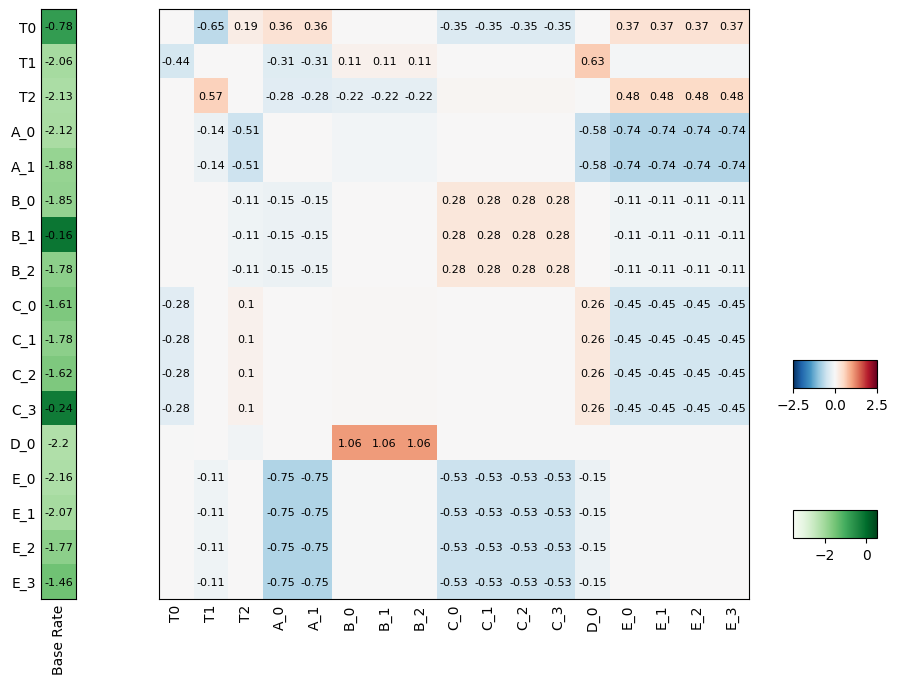

In [5]:
np.random.seed(12345)

cl_generator = cmg.ClusterableMhnGenerator(test_event_count=3,clusterCount=5)
cl_generator.setClusterMHN(rand_generator.getMHN())
cl_generator.splitClusters([2,3,4,1,4])
cl_generator.randomizeBaseRates() 
cl_generator.getMHN().plot()